# Prerequisites for Colab

### Optional clones to your drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# replace 'MyDrive' with your drive name
%cd gdrive/MyDrive

### Clone git repository

In [ ]:
!git clone -b development https://github.com/JayReigns/Detection-of-Rice-and-Potato-Plant-Disease.git

### Change Working Directory

In [ ]:
%cd Detection-of-Rice-and-Potato-Plant-Disease

### Install Modules

In [ ]:
!pip install tensorflow
!pip install matplotlib

# Imports

In [41]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Constants

In [42]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3

# Load Model

In [43]:
import os

MODEL_PATH = "models"

def listmodels():
    for f in os.listdir(MODEL_PATH):
        # skip hidden files
        if f.startswith('.'):
            continue

        name, ext = f.rsplit('.', 1)

        # skip other files
        if ext != 'h5':
            continue
        
        # skip ill-formatted files
        try:
            int(name)
            yield name
        except:
            pass
        
listed_models = list(listmodels())

if not listed_models:
    raise Exception("No Models Found!")

model_version = max( listmodels(), key= int )

model_version

'20220923_193037'

In [44]:
model = tf.keras.models.load_model(f"{MODEL_PATH}/{model_version}.h5")

# Load Image Dataset

In [45]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "images",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 8204 files belonging to 8 classes.


# Types of Classes

In [46]:
class_names = dataset.class_names
class_names

['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Rice_Blast',
 'Rice_Brown_spot',
 'Rice_Leaf_smut',
 'Rice_Tungro',
 'Rice__Bacterial_blight']

# Testing

1/1 [==============================] - 1s 669ms/step


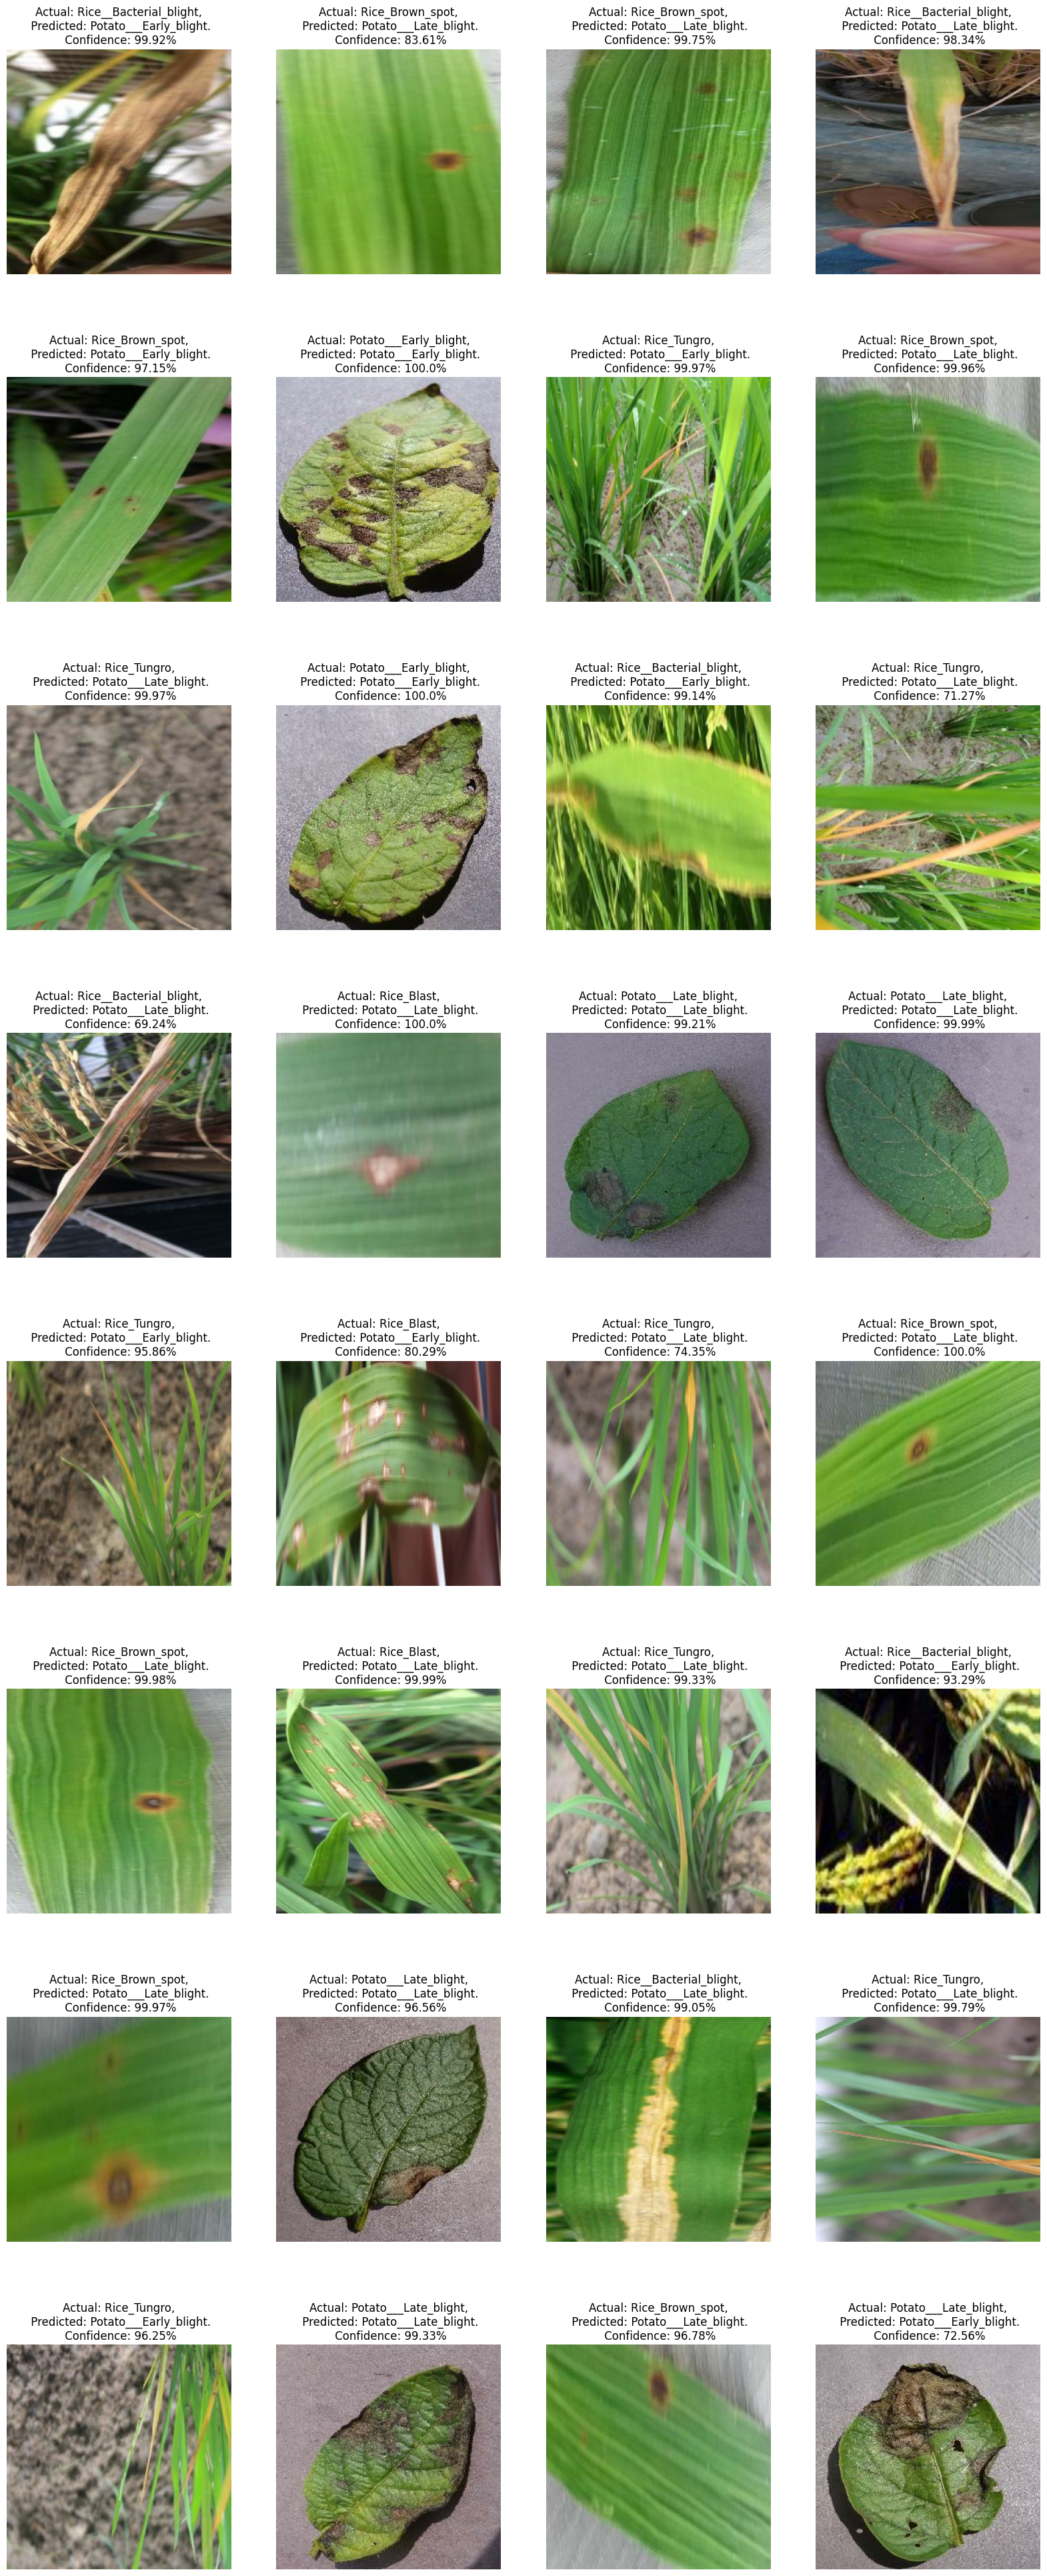

In [47]:
import numpy as np

plt.figure(figsize=(20, 50))
for image_batch, label_batch in dataset.take(1):
    
    prediction_batch = model.predict(image_batch)   # contains array of size len(class_names) with confidence
    
    for i in range(BATCH_SIZE):
        
        image = image_batch[i].numpy().astype("uint8")   # converting float to int
        
        actual_class    = class_names[label_batch[i]]
        predicted_class = class_names[np.argmax(prediction_batch[i])]
        confidence      = round(100 * (np.max(prediction_batch[i])), 2)
        
        ax = plt.subplot(BATCH_SIZE//4, 4, i + 1)   # row, col, idx
        plt.imshow(image)   
        title = plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.setp(title, color= 'g' if actual_class == predicted_class else 'r')
        plt.axis("off")